In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams

params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    death_reward=-50,
    wait_reward=-1,
    num_lane_groups=4,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
env = JaywalkEnv(params)

In [22]:
from src.agents.ppo.ppo_agent import PPOAgent

train_parameters = {
    "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
    "action_dim": 3,
    "action_space": [0, 1, 2],
    "num_layers": 3,
    "hidden_dim": 64,
    "gamma": 0.99,
    "total_training_time_step": 1000000,
    "batch_size": 2048,
    "learning_rate": 3e-4,
    "device": "cpu",
    "clip": 0.2,
    "epochs_per_iteration": 10,
    "timeout": 200,
}

agent = PPOAgent(env=env, params=train_parameters)
training_results = agent.train(train_parameters["total_training_time_step"])

Training Progress: 100%|██████████| 489/489 [02:36<00:00,  3.13it/s]


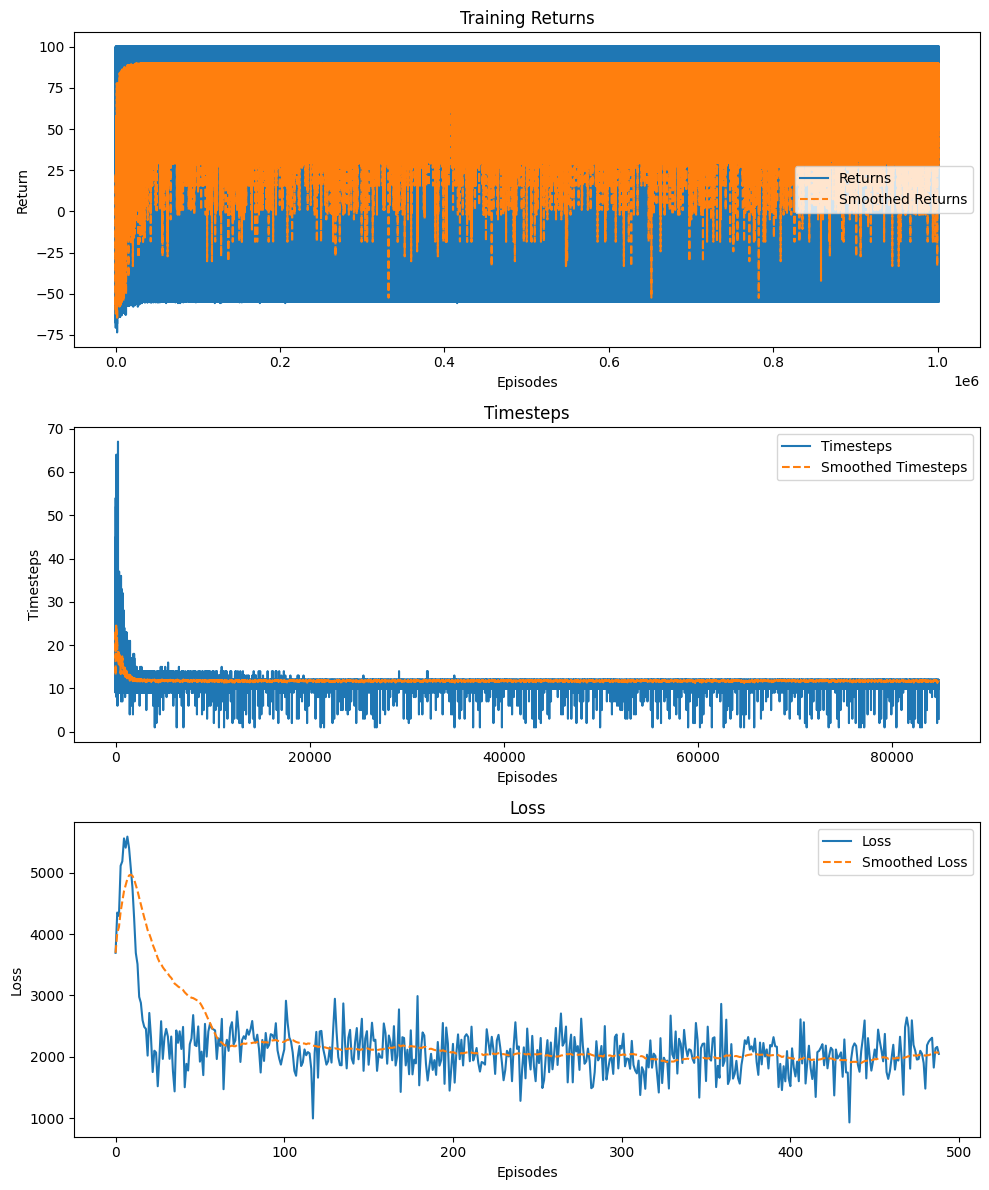

In [23]:
agent.plot_training_result(training_results)

In [17]:
agent.eval()

/Users/vatsalmehta/Desktop/jaywalker-rl/src/jaywalk_gym/jaywalk_env.py:348: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Video saved as policy_rollout.mp4!


In [3]:
train_parameters = {
    "timesteps_per_batch": 2048,
    "max_timesteps_per_episode": 200,
    "gamma": 0.99,
    "n_updates_per_iteration": 10,
    "lr": 3e-4,
    "clip": 0.2,
    "render": False,
    "render_every_i": 10,
}

Shape of network.0.weight: torch.Size([64, 146])


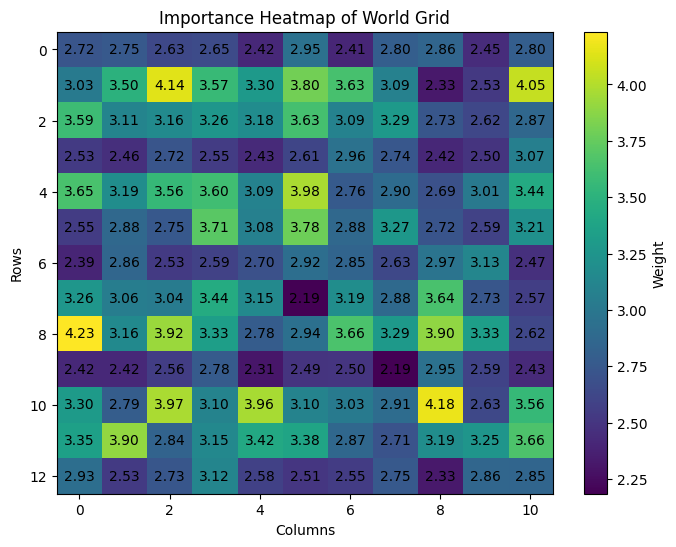

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Access and print the weights of the first fully connected layer
for name, param in agent.actor.named_parameters():
    if "network.0.weight" in name:
        weights = param.data
        print(f"Shape of {name}: {weights.shape}")
        break

# Aggregate importance across neurons (absolute sum of weights for each input)
importance = np.abs(weights.numpy()).sum(axis=0)[3:]  # Shape: (77,)

# Reshape the importance back into the grid (7x11)
importance_grid = importance.reshape(13, 11)

plt.figure(figsize=(8, 6))
plt.imshow(importance_grid, cmap="viridis", aspect="auto")
plt.colorbar(label="Weight")
plt.title("Importance Heatmap of World Grid")
plt.xlabel("Columns")
plt.ylabel("Rows")

# Optionally annotate each cell with the importance value
for i in range(13):  # Number of rows
    for j in range(11):  # Number of columns
        plt.text(
            j,
            i,
            f"{importance_grid[i, j]:.2f}",
            ha="center",
            va="center",
            color="black"
            if importance_grid[i, j] > importance_grid.max() / 2
            else "white",
        )

plt.show()